In [44]:
import pandas as pd
import os
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import normaltest
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
sb.set_theme()

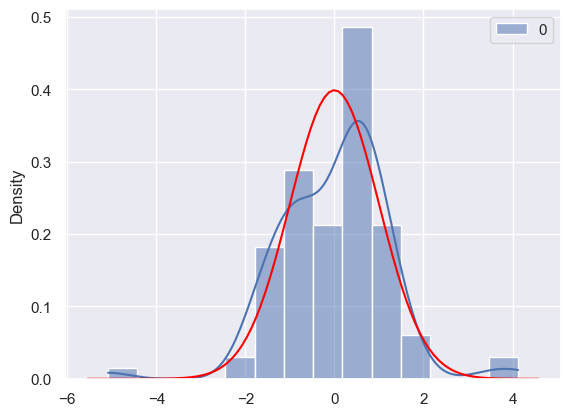

In [76]:
dataset_p2 = pd.read_csv('problem2.csv')
# get first column equals to 1
dataset_p2.insert(loc=0,column='1',value=1)
# OLS method
# convert dataset into matrix
x_p2 = np.matrix(dataset_p2.iloc[:,0:2])
y_p2 = np.matrix(dataset_p2.iloc[:,2:3])

beta_hat =  np.linalg.inv(x_p2.T * x_p2)* (x_p2.T * y_p2)
y_predict = x_p2 * beta_hat
error_vector = y_p2 - y_predict
# print(error_vector)
#plt.hist(error_vector, bins = 20, histtype= '', density=True)
hist_plot = sb.histplot(error_vector, kde = True, stat="density")

xmin, xmax = hist_plot.get_xlim()
normal_x = np.linspace(xmin, xmax, 100)
p = norm.pdf(normal_x)
hist_plot.plot(normal_x, p, color = 'red')

#normal_x = np.random.standard_normal(10)
#normal_y = norm.pdf(normal_x)

#hist_plot.plot(normal_x, normal_y, , label = "pdf")
# normaltest(error_vector)



In [71]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [26]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun

In [77]:
dataset_p1 = pd.read_csv('problem1.csv')

In [99]:
dataset_p1
data1 = dataset_p1.iloc[:,0]
data2 = dataset_p1.iloc[:,1] 

def skew_cal(data):
    count = 0
    m = np.mean(data)
    for i in data:
        count += (i - m)**3/len(data)
    count = count/(np.std(data)**3)
    return count

skew_result1 = skew_cal(data1) - skew(data1)
skew_result2 = skew_cal(data2) - skew(data2)

print(skew_result1)
print(skew_result2)
# for the skewness
# we can see that the difference is very small, the reason why the result is not 0 is probably because the rounding problem in the steps of calculations.

def kurtosis_cal(data):
    count = 0
    m = np.mean(data)
    for i in data:
        count += (i - m)**4/len(data)
    count = count/(np.std(data)**4)
    return count

kurtosis_result1 = kurtosis_cal(data1) - kurtosis(data1)
kurtosis_result2 = kurtosis_cal(data2) - kurtosis(data2)

print(kurtosis_result1)
print(kurtosis_result2)

# the package use excess kurtosis as kurtosis
# again the reason why the result is not 0 is probably because the rounding problem in the steps of calculations.

1.1102230246251565e-16
-5.551115123125783e-17
3.0000000000000004
3.0


In [91]:
np.std(data1)

1.1410710095194738